# Housekeeping

In [19]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Gathering and Defining RSI

In [20]:
TICKER = 'SPY'
RSI_LENGTH = 14
OVERBOUGHT = 70
OVERSOLD = 30
LOOKBACK = 365

def get_data(ticker=TICKER):
    df = yf.download(ticker, period='max')
    df.columns = df.columns.get_level_values(0)
    
    return df.iloc[-LOOKBACK:, :]

def add_RSI(df, length=RSI_LENGTH):
    price_change = df['Close'].diff()
    
    # define gains/losses
    gain = price_change.where(price_change > 0, 0)
    loss = -price_change.where(price_change < 0, 0)

    # average gain vs loss
    avg_gain = gain.rolling(window=length).mean()
    avg_loss = loss.rolling(window=length).mean()

    # calculate rsi
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    df['RSI'] = rsi


    plt.plot(df.index, df['RSI'])
    plt.axhline(OVERBOUGHT, color='red', linestyle='--')
    plt.axhline(OVERSOLD, color='green', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.title('Relative Strength Index (RSI)')
    plt.grid(True)
    plt.gcf().autofmt_xdate()
    plt.tight_layout()
    plt.show()

    return df

# Building and Testing the Strategy

In [21]:
def add_strategy(df, overbought = OVERBOUGHT, oversold = OVERSOLD):
    df['Strategy'] = np.where(df['RSI'] > overbought, 1, 
                              np.where(df['RSI'] < oversold, -1, 0))
    df['Strategy'] = df['Strategy'].shift(1)
    return df
    
def test_strategy(df):
    df['Asset_Returns'] = (1 + df['Close'].pct_change()).cumprod() - 1
    df['Strategy_Returns'] = (1 + df['Close'].pct_change() * df['Strategy']).cumprod() - 1

    plt.figure()
    plt.plot(df.index, df['Asset_Returns'], label=f'{TICKER} Buy & Hold')
    plt.plot(df.index, df['Strategy_Returns'], label='RSI Strategy')
    plt.legend()
    plt.title(f'RSI Strategy vs {TICKER}')
    plt.grid(True)
    plt.gcf().autofmt_xdate()
    plt.tight_layout()
    plt.show()

    return df

def return_summary(df, TICKER, LOOKBACK):
    asset_return = df['Asset_Returns'].iloc[-1] * 100
    strategy_return = df['Strategy_Returns'].iloc[-1] * 100
    print(f"{TICKER} Buy & Hold Return: {asset_return:.2f}%")
    print(f"RSI Strategy Return: {strategy_return:.2f}%")

# Executing Code

C:\Users\edwar\AppData\Local\Temp\ipykernel_16472\1924049690.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period='max')
[*********************100%***********************]  1 of 1 completed


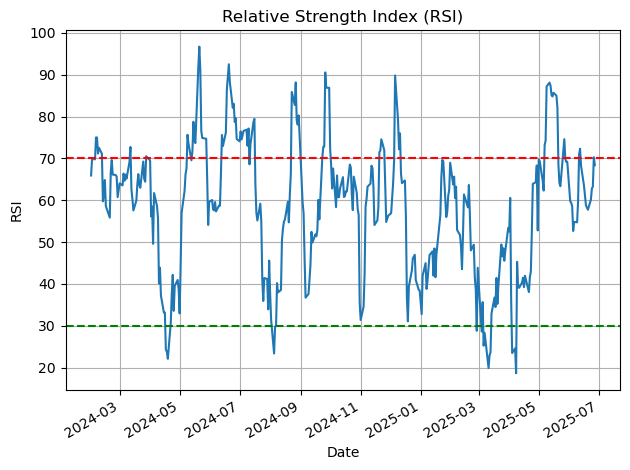

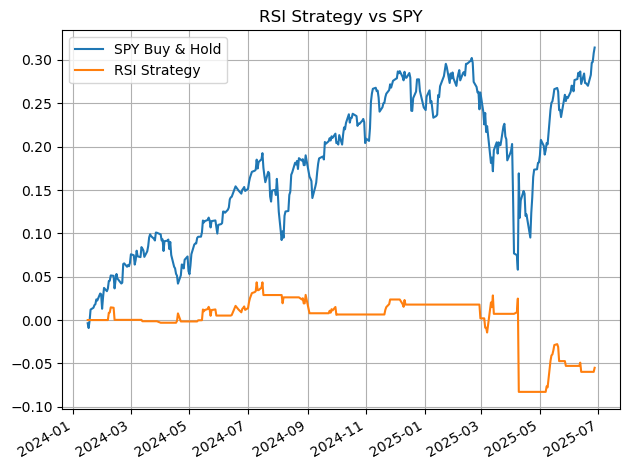

SPY Buy & Hold Return: 31.43%
RSI Strategy Return: -5.51%


Price,Close,High,Low,Open,Volume,RSI,Strategy,Asset_Returns,Strategy_Returns
Date,,,,,,,,,
2024-01-12,467.848328,469.732768,466.425210,468.986839,57944000,NaN,NaN,NaN,NaN
2024-01-16,466.130676,467.779543,464.295328,466.454579,85014900,NaN,0.0,-0.003671,0.000000
2024-01-17,463.539642,464.030379,461.164466,463.078349,68843900,NaN,0.0,-0.009210,0.000000
2024-01-18,467.661774,468.221220,463.667204,465.227741,91856200,NaN,0.0,-0.000399,0.000000
2024-01-19,473.491730,473.776365,467.710873,468.800293,110733300,NaN,0.0,0.012062,0.000000
...,...,...,...,...,...,...,...,...,...
2025-06-23,600.150024,600.539978,591.890015,595.039978,87426000,60.120978,0.0,0.282788,-0.059755
2025-06-24,606.780029,607.849976,603.409973,604.330017,67735300,62.793405,0.0,0.296959,-0.059755
2025-06-25,607.119995,608.609985,605.539978,607.909973,62114800,63.257648,0.0,0.297686,-0.059755


In [22]:
def main():
    df = get_data()
    df = add_RSI(df)
    df = add_strategy(df)
    df = test_strategy(df)
    return_summary(df, TICKER, LOOKBACK)
    return df

main()